In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
data = pd.read_csv("train_titanic.csv")
data.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
for col in data.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:   Survived	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 19.87%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 0.00%
column:       Fare	 percent of NaN value: 0.00%
column:      Cabin	 percent of NaN value: 77.10%
column:   Embarked	 percent of NaN value: 0.22%


1. terdiri dari 12 kolom, dan lebih baik menghapus kolom Cabin Karena terlalu banyak missing value
2. dan pada variable Age, Embarked Terdapat data yang kosong

In [ ]:
cat = ["Name","Sex","Ticket","Cabin","Embarked"]
num = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]

In [ ]:
data[cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harder, Mr. George Achilles",male,347082,B96 B98,S
freq,1,577,7,4,644


1. jenis kelamin penumpang mayoritas pria
2. ticket kemungkinan mengalami duplikat karena ada ticket dengan kuantitas 7
3. mayoritas penumpang berangkat pada pelabuhan SOUTHAMPTON

In [ ]:
data[num].describe().style.background_gradient(axis=1,cmap=sns.light_palette('navy', as_cmap=True))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. penumpang mayoritas tidak selamat
2. membeli tiket rata-rata pada kelas 2 (middle) sampai 3 (low)
3. berumur 29 tahun yang artinya penumpang rata-rata dewasa muda
4. rata-rata penumpang kapal berpasangan 
5. dan mereka tidak memiliki anak/ orang tua ketika berada dikapal
6. tarif penumpang rata-rata $32/ penumpang
7. dan variable yang kemungkinan skew adalah Fare, tetapi kita perlu cek nilai skew agar mendapatkan nilai yang cocok dalam mengisi nilai yang hilang

In [ ]:
for col in cat: #berikut adalah searan nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Name:
Harder, Mr. George Achilles                            1
Klasen, Mr. Klas Albin                                 1
Sage, Miss. Stella Anna                                1
Wells, Miss. Joan                                      1
Holverson, Mrs. Alexander Oskar (Mary Aline Towner)    1
                                                      ..
Sivic, Mr. Husein                                      1
O'Connor, Mr. Maurice                                  1
Eklund, Mr. Hans Linus                                 1
Ivanoff, Mr. Kanio                                     1
Swift, Mrs. Frederick Joel (Margaret Welles Barron)    1
Name: Name, Length: 891, dtype: int64

Value count kolom Sex:
male      577
female    314
Name: Sex, dtype: int64

Value count kolom Ticket:
347082      7
1601        7
CA. 2343    7
347088      6
CA 2144     6
           ..
2631        1
PC 17482    1
347468      1
111426      1
349246      1
Name: Ticket, Length: 681, dtype: int64

Value count k

UNIVARIATE ANALYSIS : analysis satu variable

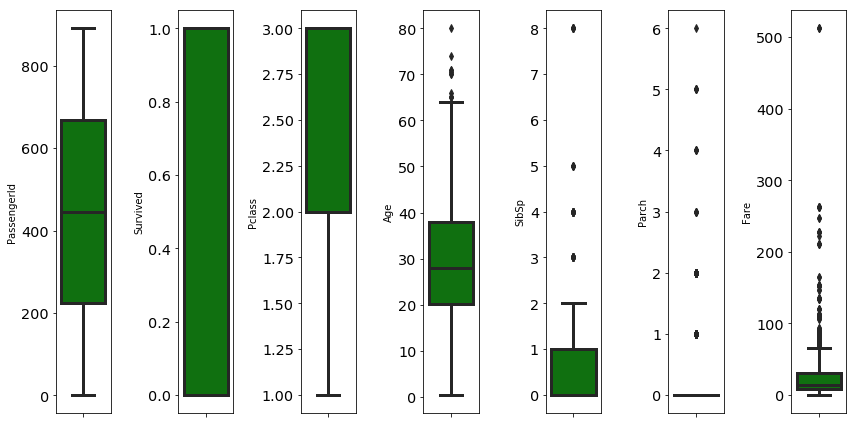

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(data[num[i]], color='green', orient='v')
    plt.tight_layout()

1. terlihat variable Pclass skew negatif
2. variable age, sibsp, fare skew positif dan masing-masing variable terdapat outlier sehingga perlu dihapus

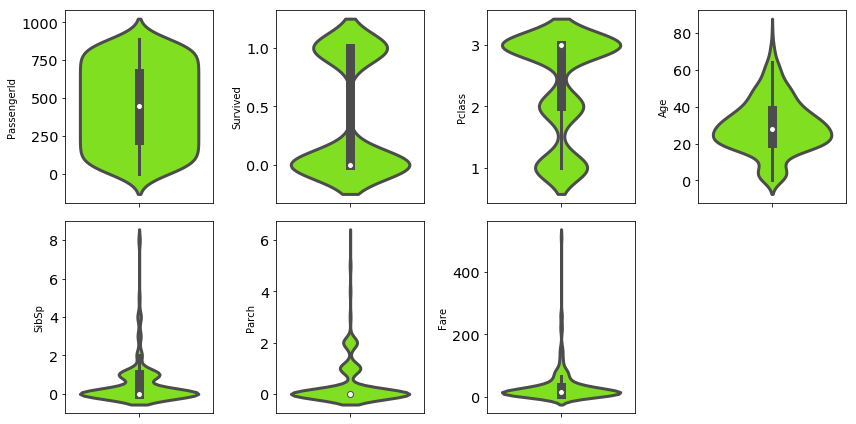

In [ ]:
#violin plot : alternatif jika kesulitan membaca distribusi data
for i in range(0, len(num)):
    plt.subplot(2,4, i+1)
    sns.violinplot(data[num[i]], color='chartreuse', orient='v')
    plt.tight_layout()

1. terlihat pada kolom survived mayoritas tidak selamat (0)
2. mayoritas penumpang berada dikelas low (3)
3. mayoritas distribusi umur berada pada angka 20-40th skew positif
4. mayoritas penumpang lajang sampai berpasangan (0 s/d 1)
5. dan tidak memilki anak atau orang tua yang berada dikapal
6. range biaya antara $0-20/ penumpang

In [ ]:
#menghapus kolom yang banyak unique nya
data.drop(['Name', 'PassengerId','Cabin'], axis=1, inplace=True)

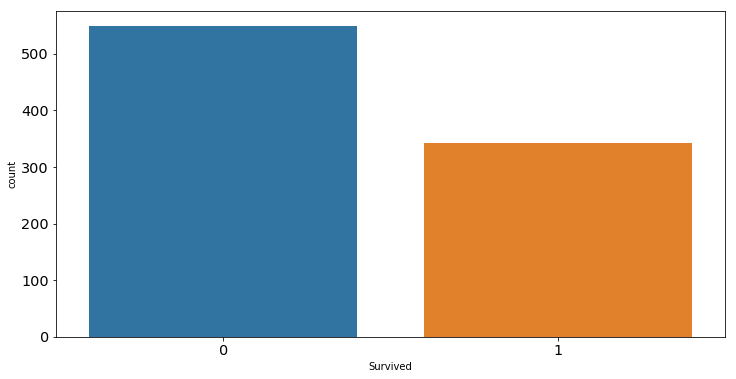

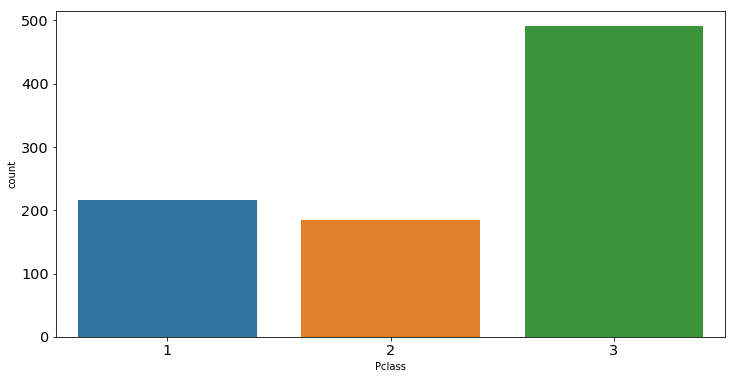

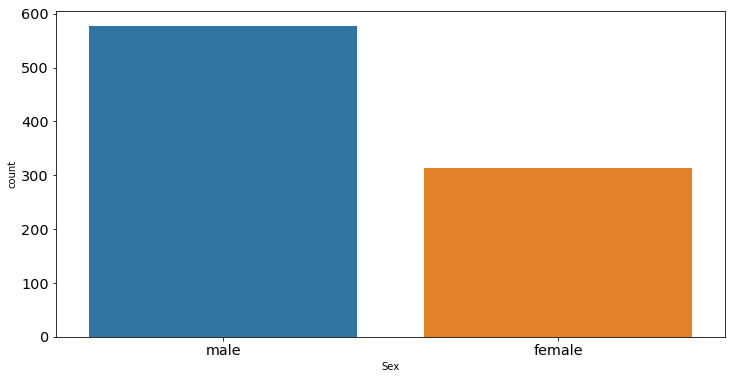

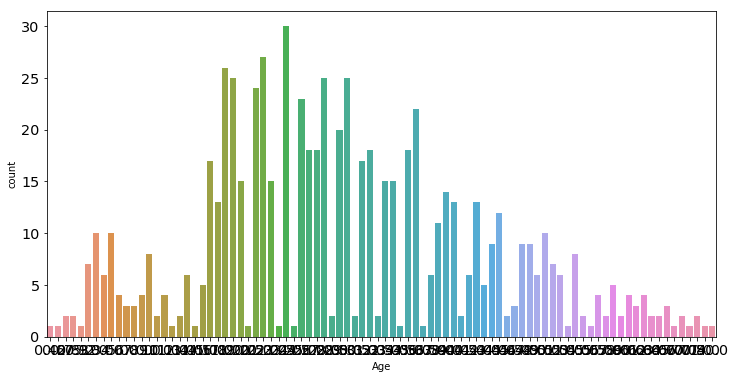

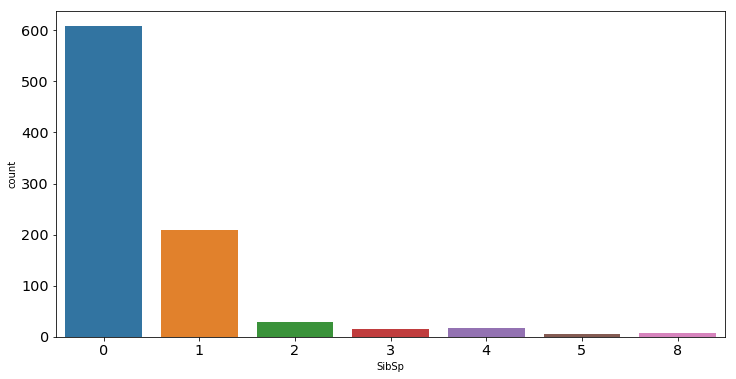

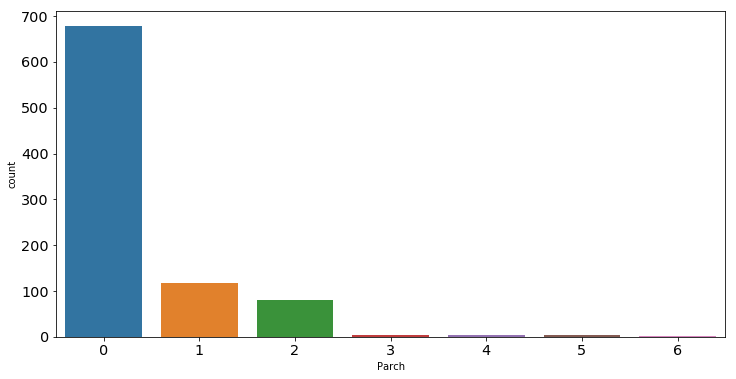

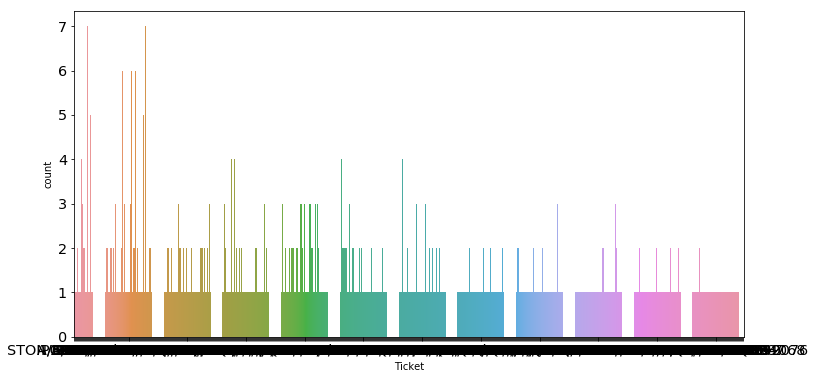

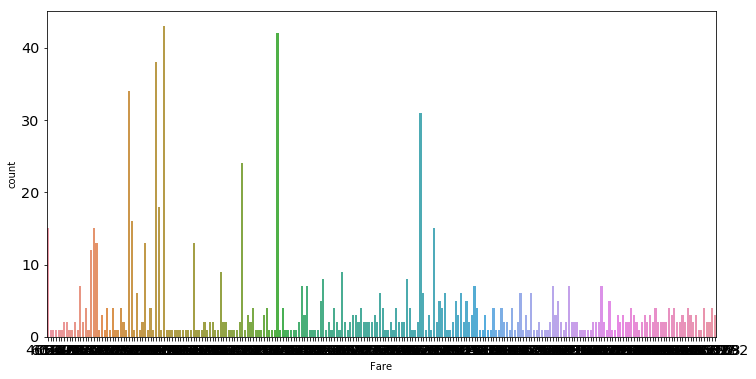

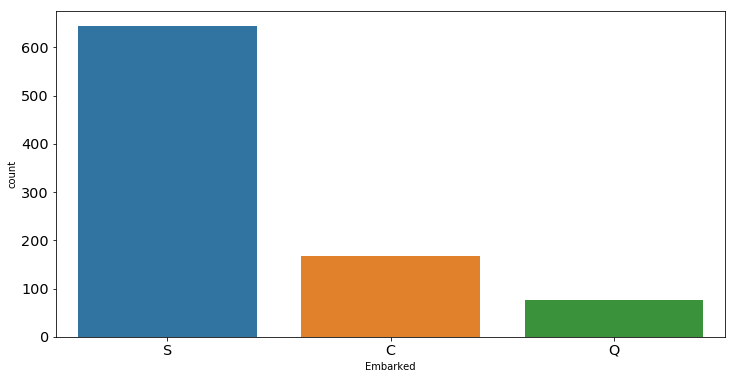

In [ ]:
for i in data.columns: #visualisasi univariate
    sns.countplot(data[i])
    plt.show()

validasi :
1. penumpang tidak selamat lebih banyak dari yang selamat
2. penumpang kelas 3 mayoritas dikapal titanic
3. penumpang berjenis kelamin pria > perempuan
4. mayoritas penumpang lajang  dibuktikan dengan kolom sibsp dan parch dengan angka 0
5. penumpang mayoritas berangkat dari pelabuhan southampton


MISSING DATA AND HANDLE IT

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

terdapat kolom yang kosong yaitu age yang dihandle dengan rata-rata nilai age dan kolom embarked diisi dengan modus (S)

In [ ]:
#IMPUTASI DATA CATEGORICAL
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
#imputasi data numerikal
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
data.isna().sum() #sudah tidak ada data kosong

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
print(data.duplicated().sum()) #cek duplikated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum()) #data sudah tidak ada data duplikated

15
0


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['Age','Fare']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 876
Jumlah baris setelah memfilter outlier: 711


In [ ]:
pd.set_option("display.float", "{:.4f}".format)
data1.skew().to_frame().rename(columns={0:'Skewness'}).sort_values('Skewness')

,Skewness
Pclass,-1.1072
Age,0.0163
Survived,0.7086
Fare,1.5126
SibSp,2.9364
Parch,3.3665


terlihat yang memiliki skew cukup besar adalah parch, sibsp, fare, dan pclass sehingga perlu dilakukan normalization

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE

data1['Pclass_norm'] = MinMaxScaler().fit_transform(data1['Pclass'].values.reshape(len(data1), 1))
data1['Fare_norm'] = MinMaxScaler().fit_transform(data1['Fare'].values.reshape(len(data1), 1))
data1['SibSp_norm'] = MinMaxScaler().fit_transform(data1['SibSp'].values.reshape(len(data1), 1))
data1['Parch_norm'] = MinMaxScaler().fit_transform(data1['Parch'].values.reshape(len(data1), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
data1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm
886,0,2,male,27.0000,0,0,211536,13.0000,S,0.5000,0.2052,0.0000,0.0000
887,1,1,female,19.0000,0,0,112053,30.0000,S,0.0000,0.4735,0.0000,0.0000
888,0,3,female,29.6991,1,2,W./C. 6607,23.4500,S,1.0000,0.3701,0.2000,0.3333
889,1,1,male,26.0000,0,0,111369,30.0000,C,0.0000,0.4735,0.0000,0.0000
890,0,3,male,32.0000,0,0,370376,7.7500,Q,1.0000,0.1223,0.0000,0.0000


In [ ]:
#perlu hapus variable yang sebelum dinormalization
data1.drop(['Pclass','SibSp','Parch','Fare'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


BIVARIATE ANALYSIS : melihat hubungan antar variable

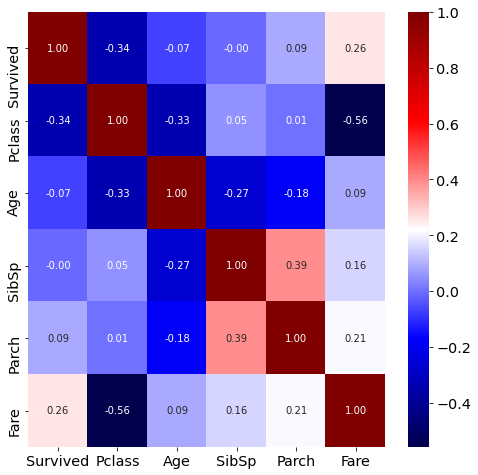

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='seismic', annot=True, fmt='.2f')
#terlihat pclass dengan fare kemungkinan multikolinearitas dan 
#masih banyak nilai korelasi yang kecil terhadap label sehingga perlu modifikasi variable lagi

<Figure size 1080x1080 with 0 Axes>

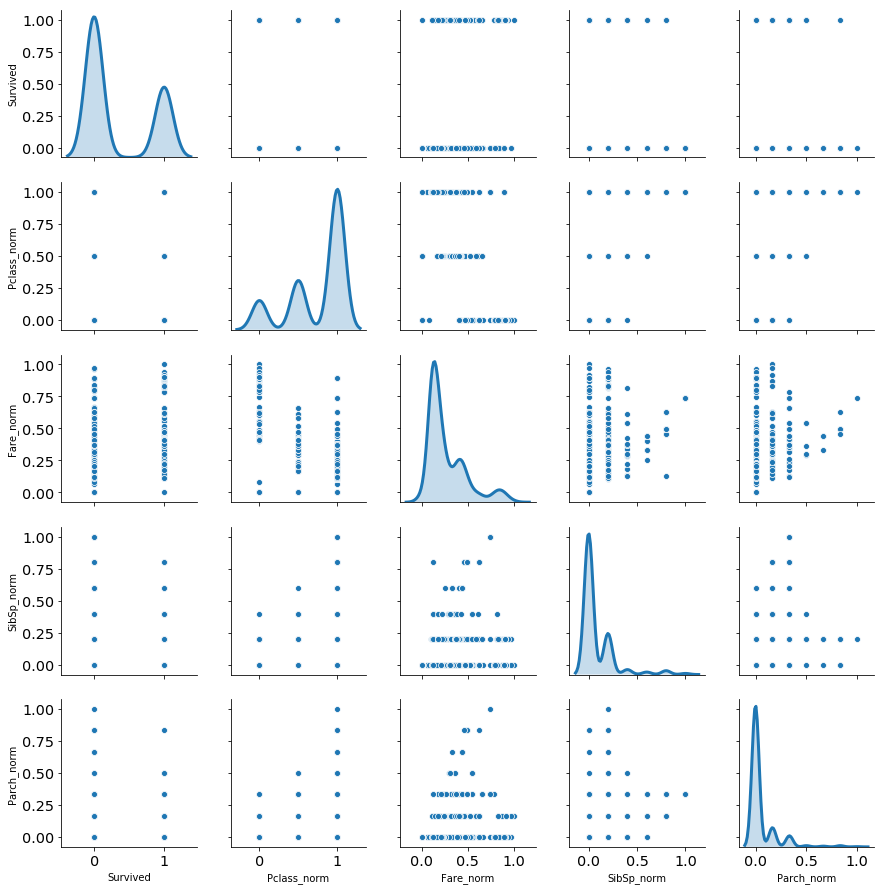

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(data1, diag_kind='kde') 

In [ ]:
del data1['Ticket'] #hapus ticket karena terlalu banyak nilai unique

In [ ]:
data2 = pd.get_dummies(data1)
data2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0000,1.0000,0.1144,0.2000,0.0000,0,1,0,0,1
2,1,26.0000,1.0000,0.1251,0.0000,0.0000,1,0,0,0,1
3,1,35.0000,0.0000,0.8381,0.2000,0.0000,1,0,0,0,1
4,0,35.0000,1.0000,0.1271,0.0000,0.0000,0,1,0,0,1
5,0,29.6991,1.0000,0.1335,0.0000,0.0000,0,1,0,1,0


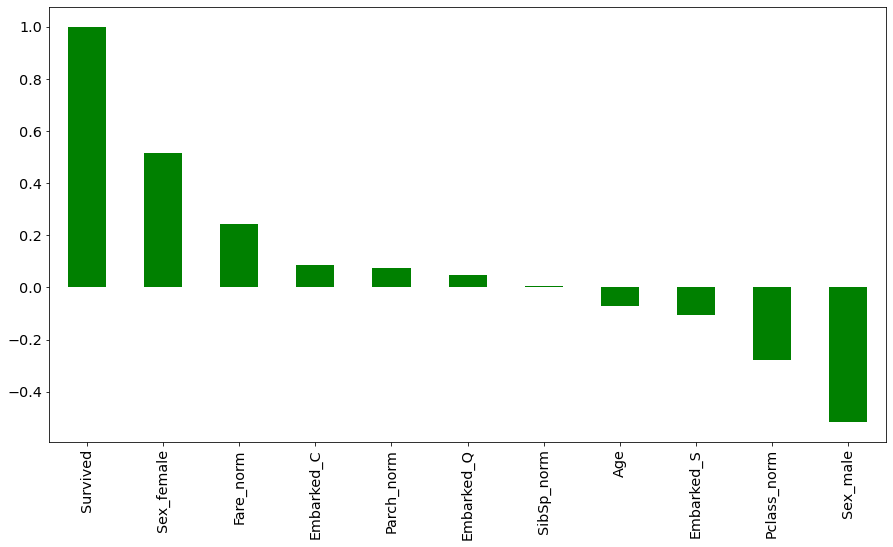

In [ ]:
#BIVARIATE ANALYSIS
#cek korelasi antar feature
plt.figure(figsize=(15,8))
data2.corr()['Survived'].sort_values(ascending = False).plot(kind='bar', color='green')
#terlihat variable female, male yang memiliki korelasi cukup tinggi (tetapi kurang! variablenya sehingga perlu modifikasi)

Text(0.5, 1.0, 'PROPORSI survived (%)')

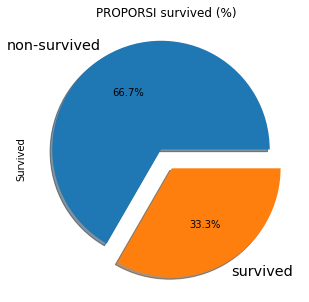

In [ ]:
#EDA VISUALIZATION
labels = 'non-survived','survived'
data2['Survived'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI survived (%)") #data imbalance perlu tindakan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

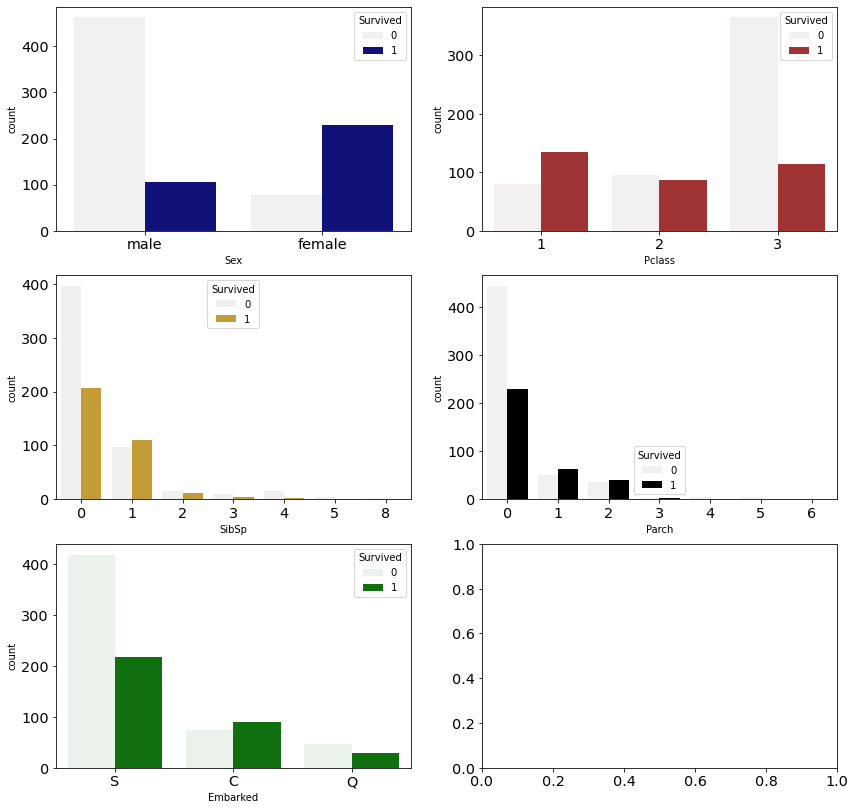

In [ ]:
fig, ax =plt.subplots(nrows=3,ncols=2,figsize=(14,14))
sns.countplot('Sex',hue='Survived',data=data,color='darkblue',ax=ax[0,0])
sns.countplot('Pclass',hue='Survived',data=data,color='firebrick',ax=ax[0,1])
sns.countplot('SibSp',hue='Survived',data=data,color='goldenrod',ax=ax[1,0])
sns.countplot('Parch',hue='Survived',data=data,color='black',ax=ax[1,1])
sns.countplot('Embarked',hue='Survived',data=data,color='green',ax=ax[2,0])
plt.show()

1. penumpang selamat mayoritasperempuan
2. dan yang selamat mayoritas berada dikelas 1 (high class)
3. penumpang yang memiliki 1 pasangan atau satu saudara kandung dan satu anak kandung/ orang tua banyak yang selamat 
4. banyak yang selamat berangkat dari pelabuhan Cherbourg (C)

In [ ]:
 #lets create age category
data2['kategori_umur'] = pd.cut(data2['Age'].astype(int), bins=[-1,11,18,22,27,33,40,66,100],
                                    labels=[1,2,3,4,5,6,7,8]).to_frame()
    
#create a new column for the total number of family (Passenger )
data2['jumlah_keluarga'] = data2['Parch_norm']+ data2['SibSp_norm']+ 1 
data2['jumlah_keluarga'] = data2['jumlah_keluarga'].astype(int)
    
    # Age times Class
data2['age_class'] = data2['kategori_umur'] * data2['Pclass_norm']
data2['age_class'] = data2['age_class'].astype(int) 
    
    # Fare per Person
data2['biaya_per_orang'] = data2['Fare_norm']/(data2['jumlah_keluarga'])
data2['biaya_per_orang'] = data2['biaya_per_orang'].astype(float)  
    
    # Is alone
data2['is_alone'] = 0
data2.loc[data2['jumlah_keluarga'] == 1, 'is_alone'] = 1
    
    #convert pclass, sibsp and parch columns to int
data2[['Pclass_norm','SibSp_norm','Parch_norm']] = data2[['Pclass_norm','SibSp_norm','Parch_norm']].astype(int)

In [ ]:
data2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,0,22.0000,1,0.1144,0,0,0,1,0,0,1,3,1,3,0.1144,1
2,1,26.0000,1,0.1251,0,0,1,0,0,0,1,4,1,4,0.1251,1
3,1,35.0000,0,0.8381,0,0,1,0,0,0,1,6,1,0,0.8381,1
4,0,35.0000,1,0.1271,0,0,0,1,0,0,1,6,1,6,0.1271,1
5,0,29.6991,1,0.1335,0,0,0,1,0,1,0,5,1,5,0.1335,1


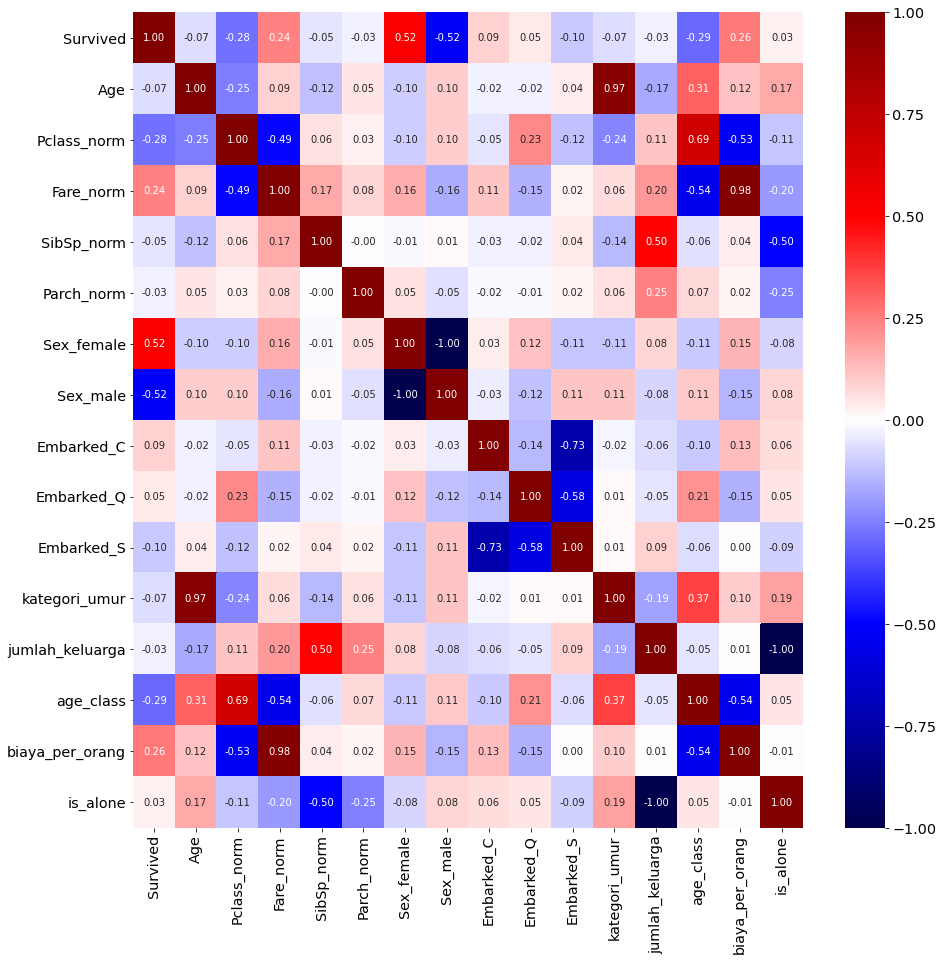

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data2.corr(), cmap='seismic', annot=True, fmt='.2f')
#terlihat pclass dengan fare multikolinearitas dan 
#masih banyak nilai korelasi yang kecil terhadap label sehingga perlu modifikasi variable lagi

In [ ]:
data2.drop(['Age','Fare_norm'], axis=1, inplace=True)

In [ ]:
X

,Pclass_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kategori_umur,jumlah_keluarga,age_class,biaya_per_orang,is_alone
0,1,0,0,0,1,0,0,1,3,1,3,0.1144,1
2,1,0,0,1,0,0,0,1,4,1,4,0.1251,1
3,0,0,0,1,0,0,0,1,6,1,0,0.8381,1
4,1,0,0,0,1,0,0,1,6,1,6,0.1271,1
5,1,0,0,0,1,0,1,0,5,1,5,0.1335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0,1,4,1,2,0.2052,1
887,0,0,0,1,0,0,0,1,3,1,0,0.4735,1
888,1,0,0,1,0,0,0,1,5,1,5,0.3701,1
889,0,0,0,0,1,1,0,0,4,1,0,0.4735,1


In [ ]:
#karena data imbalance 
data2['Survived_class'] = data2['Survived'] > 0.8
data2['Survived_class'].value_counts()

False    474
True     237
Name: Survived_class, dtype: int64

In [ ]:
X = data2[[col for col in data2.columns if (str(data2[col].dtype) != 'object') and col not in ['Survived', 'Survived_class']]]
y = data2['Survived_class'].values
print(X.shape)
print(y.shape)

(711, 13)
(711,)


In [ ]:
from imblearn.over_sampling import SMOTE
## undersampling agar ringan beban komputasinya
from imblearn import under_sampling
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


True     237
False    237
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [ ]:
from sklearn.svm import SVC #MODEL SVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
base_models = [("SVM",      SVC(kernel='linear')),                                                               #Support Vector Machines
               ("kNN",      KNeighborsClassifier(n_neighbors = 3)),                               #KNeighborsClassifier
               ("LR_model", LogisticRegression(random_state=95,n_jobs=-1)),                       #Logistic Regression model
               ("DT_model", DecisionTreeClassifier(random_state=95)),                             #Decision tree model
               ("RF_model", RandomForestClassifier(n_estimators=200 , oob_score = True, n_jobs = -1,
                                  random_state =95, max_features = "auto",
                                  max_leaf_nodes = 30)),                  #Random Forest model
               ("XGBoost", XGBClassifier(n_estimators=200)),                                                      #XGBoost model
               ("Bagging_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),        #Bagging model
                                                 max_samples=30,
                                                 n_estimators=500,
                                                 n_jobs=-1,
                                                 bootstrap=True,
                                                 oob_score=True)),
               ("Random_subspaces_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random subspaces model
                                                           n_estimators=100,
                                                           bootstrap=False,
                                                           max_samples=1.0,
                                                           max_features=True,
                                                           bootstrap_features=True,
                                                           n_jobs=-1)),
                ("Random_Patches_model", BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random Patches model
                                                            n_estimators=100,
                                                            bootstrap=True,
                                                            max_samples=1.0,
                                                            max_features=True,
                                                            bootstrap_features=True,
                                                            n_jobs=-1)),
                ("AdaBoost_model",AdaBoostClassifier(DecisionTreeClassifier(),                      #AdaBoost model
                                                    n_estimators=100,
                                                    learning_rate=0.01)),
                ("GradientBoosting",GradientBoostingClassifier(max_depth=2,                        #GradientBoosting model
                                                              n_estimators=100))]

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
kfolds = 10   # it is better to be 1/(size of testing test)
split = StratifiedKFold(n_splits=kfolds,
                        shuffle=True, 
                        random_state=42)  # use shuffle to ensure random distribution of data

# Preprocessing, fitting, making predictions and scoring for every model:
models_data = {'min_score':{},'max_score':{},'mean_score':{},'std_dev':{}}
for name, model in base_models:
    # get cross validation score for each model:
    cv_results = cross_val_score(model, 
                                 X_test, y_test, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    
    # output:
    #To find the average of all the accuracies.
    min_score = round(min(cv_results)*100, 4)
    models_data['min_score'][name] = min_score
     
    #To find the max accuracy of all the accuracies.
    max_score = round(max(cv_results)*100, 4)
    models_data['max_score'][name] = max_score
    
    #To find the min accuracy of all the accuracies.
    mean_score = round(np.mean(cv_results)*100, 4)
    models_data['mean_score'][name] = mean_score
    
    # let's find the standard deviation of the data to see degree of variance in the results obtained by our model.
    std_dev = round(np.std(cv_results), 4)
    models_data['std_dev'][name] = std_dev
    
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) ---> min: {min_score}, max: {max_score}")

SVM cross validation accuarcy score: 79.8095 +/- 0.0631 (std) ---> min: 71.4286, max: 92.8571
kNN cross validation accuarcy score: 74.0476 +/- 0.1203 (std) ---> min: 50.0, max: 86.6667
LR_model cross validation accuarcy score: 77.7143 +/- 0.0798 (std) ---> min: 64.2857, max: 92.8571
DT_model cross validation accuarcy score: 70.4762 +/- 0.0979 (std) ---> min: 50.0, max: 80.0
RF_model cross validation accuarcy score: 74.0476 +/- 0.092 (std) ---> min: 57.1429, max: 85.7143
XGBoost cross validation accuarcy score: 78.2857 +/- 0.1031 (std) ---> min: 64.2857, max: 92.8571
Bagging_model cross validation accuarcy score: 74.8571 +/- 0.0702 (std) ---> min: 64.2857, max: 85.7143
Random_subspaces_model cross validation accuarcy score: 70.5714 +/- 0.0631 (std) ---> min: 64.2857, max: 80.0
Random_Patches_model cross validation accuarcy score: 67.1429 +/- 0.0297 (std) ---> min: 64.2857, max: 71.4286
AdaBoost_model cross validation accuarcy score: 70.5238 +/- 0.0969 (std) ---> min: 50.0, max: 80.0
Gra

In [ ]:
models_df = pd.DataFrame(models_data).sort_values(by='mean_score',ascending=False)
models_df

,min_score,max_score,mean_score,std_dev
SVM,71.4286,92.8571,79.8095,0.0631
XGBoost,64.2857,92.8571,78.2857,0.1031
LR_model,64.2857,92.8571,77.7143,0.0798
GradientBoosting,57.1429,92.8571,76.1905,0.1010
Bagging_model,64.2857,85.7143,74.8571,0.0702
kNN,50.0000,86.6667,74.0476,0.1203
RF_model,57.1429,85.7143,74.0476,0.0920
Random_subspaces_model,64.2857,80.0000,70.5714,0.0631
AdaBoost_model,50.0000,80.0000,70.5238,0.0969
DT_model,50.0000,80.0000,70.4762,0.0979


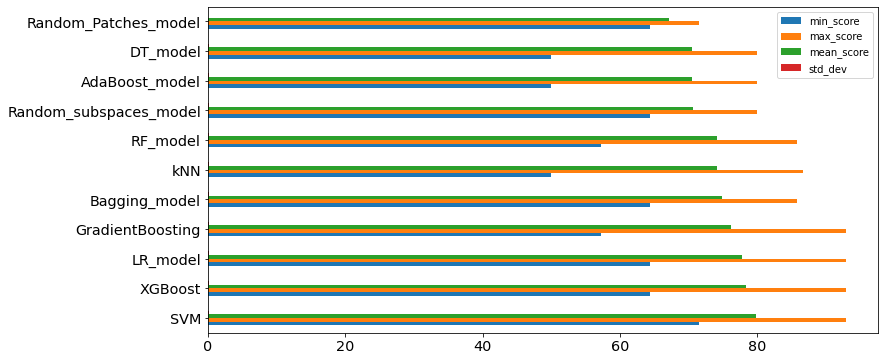

In [ ]:
models_df.plot(kind='barh')

TANPA MENGGUNAKAN CROSS VALIDATION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test)) 

0.8111888111888111


In [ ]:
#MODEL RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1,
                                  random_state =75, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8321678321678322


In [ ]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8041958041958042

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8111888111888111

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8531468531468531

In [ ]:
#DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense
# define the keras sequential model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=200, batch_size=13)

Epoch 1/200
55/55 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8298
Epoch 2/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8284
Epoch 3/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8284
Epoch 4/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8186
Epoch 5/200
55/55 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8228
Epoch 6/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8312
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8270
Epoch 8/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8326
Epoch 9/200
55/55 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8312
Epoch 10/200
55/55 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8326
Epoch 11/

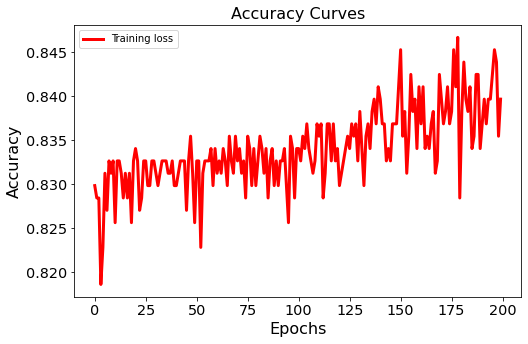

In [ ]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') #SKOR AKURASI TERTINGGI DIDEEP LEARNING

Accuracy: 84.62
